In [16]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
data = pd.read_excel("prediction_data.xlsx", sheet_name="v_churn")

In [4]:
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

# Data Preprocessing

In [5]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [6]:
data.head(5)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed
3,Male,35,No,Maharashtra,10,12,NaN,Yes,No,Yes,...,Two Year,Yes,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed


In [7]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

In [8]:
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [9]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [10]:
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model

In [43]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

In [44]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = rf_model.predict(X_test)

In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [47]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] #selection features using feature importance  

In [48]:
importances

array([0.00855149, 0.0649958 , 0.00993381, 0.0409225 , 0.03819612,
       0.04671594, 0.02487679, 0.00319354, 0.0085901 , 0.01485564,
       0.02811424, 0.01566039, 0.00893493, 0.00871827, 0.01720913,
       0.00822671, 0.00728233, 0.00826206, 0.00733619, 0.14715044,
       0.01229486, 0.01829385, 0.08806589, 0.12248243, 0.00717505,
       0.01031236, 0.08350711, 0.14014202])

In [49]:
indices

array([19, 27, 23, 22, 26,  1,  5,  3,  4, 10,  6, 21, 14, 11,  9, 20, 25,
        2, 12, 13,  8,  0, 17, 15, 18, 16, 24,  7])

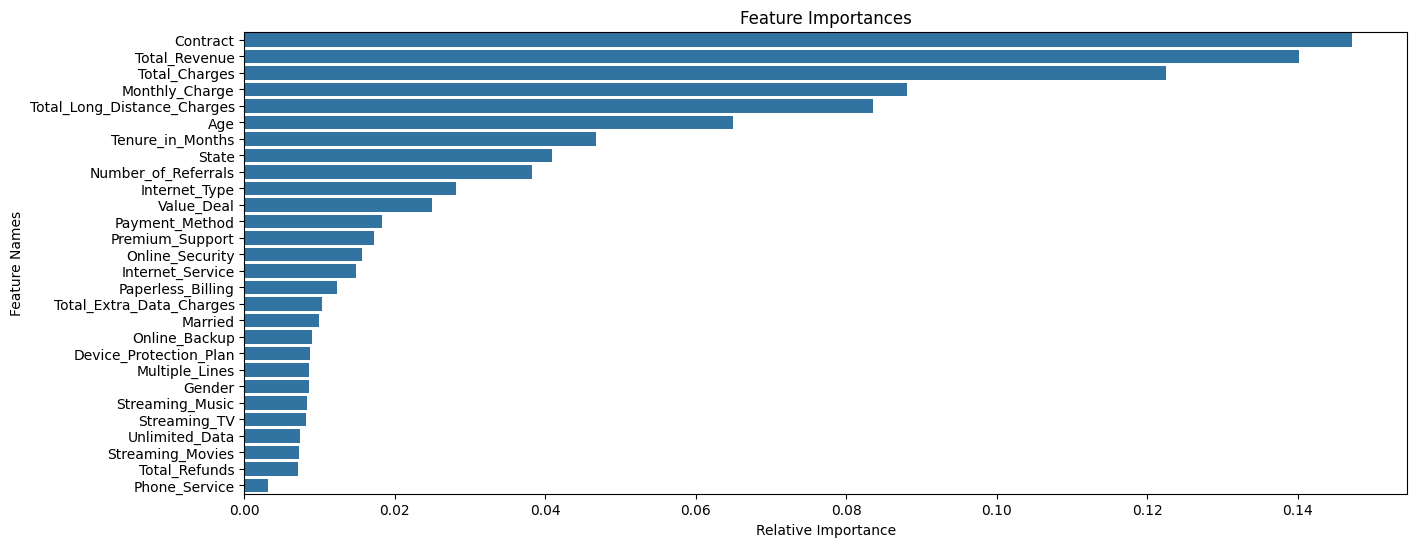

In [60]:
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [62]:
df = pd.DataFrame(importances[indices],data.columns[indices])

In [63]:
df

,0
Contract,0.147150
Total_Revenue,0.140142
Total_Charges,0.122482
Monthly_Charge,0.088066
Total_Long_Distance_Charges,0.083507
Age,0.064996
Tenure_in_Months,0.046716
State,0.040922
Number_of_Referrals,0.038196
Internet_Type,0.028114


# Predict on new data

In [81]:
n_data = pd.read_excel("prediction_data.xlsx", sheet_name="v_joinchurn")

In [82]:
o_data = n_data.copy()

In [83]:
n_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others


In [84]:
columns_id = n_data['Customer_ID']

In [85]:
n_data = n_data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Customer_Status'], axis=1)

In [86]:
for column in n_data.select_dtypes(include=['object']).columns:
    n_data[column] = label_encoders[column].transform(n_data[column])

In [87]:
new_predictions = rf_model.predict(n_data)

In [88]:
o_data['Customer Status Predicted'] = new_predictions

In [89]:
o_data = o_data[o_data['Customer Status Predicted']==1]

In [90]:
o_data.to_csv(r"prediction.csv",index=False)

In [91]:
o_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer Status Predicted
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others,1
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others,1
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others,1
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others,1
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,99475-KAR,Male,22,Yes,Karnataka,11,11,NaN,Yes,No,...,51.549999,106.199997,0.0,0,37.220001,143.419998,Joined,Others,Others,1
406,99488-KAR,Male,50,Yes,Karnataka,10,31,NaN,No,No,...,24.400000,24.400000,0.0,0,0.000000,24.400000,Joined,Others,Others,1
408,99855-MAH,Female,50,Yes,Maharashtra,5,29,NaN,Yes,No,...,69.699997,135.199997,0.0,0,31.340000,166.539993,Joined,Others,Others,1
409,99862-BIH,Female,30,No,Bihar,12,9,Deal 5,Yes,No,...,74.000000,74.000000,0.0,0,23.700001,97.699997,Joined,Others,Others,1
